In [1]:
#Importing Imprtant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
df=load_wine()

In [3]:
#Five Point summary of Dataset
df_dataset=pd.DataFrame(data=df.data,columns=df.feature_names)
df_dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
#Adding tartget column in dataset
df_dataset['target']=df.target

In [5]:
#Final Dataset 
df_dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# Dividing dataset into x and y
x=df_dataset.drop('target',axis=1)
y=df_dataset.target

<AxesSubplot:>

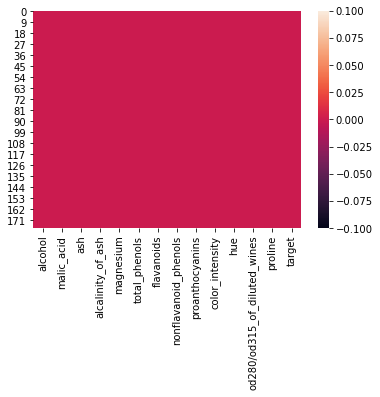

In [7]:
#check null value in dataset
sns.heatmap(df_dataset.isnull())

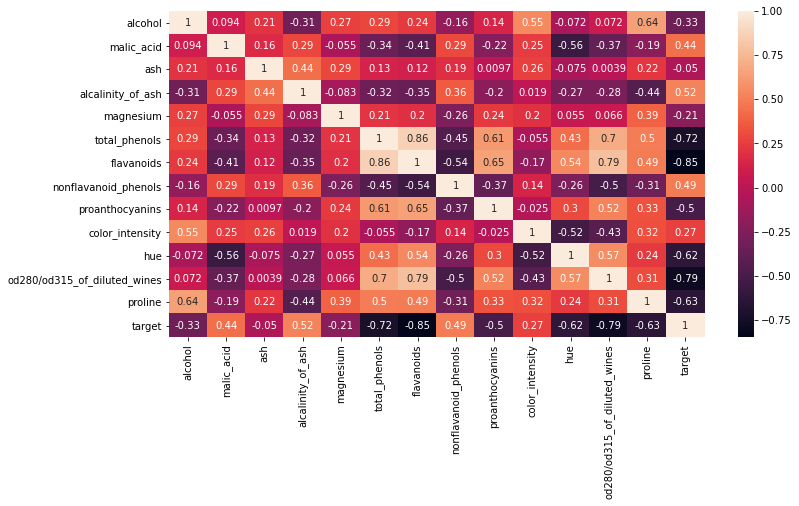

In [8]:
#Ploting heatmap for correlation between features
plt.figure(figsize=(12,6))
sns.heatmap(df_dataset.corr(),annot=True)
plt.show()

In [9]:
#Train and test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
#Importing Support Vector Machine Classifier
from sklearn.svm import SVC
model=SVC()

In [11]:
#Fit the model
model.fit(x_train,y_train)

SVC()

In [12]:
#Predicting the value
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 2, 1])

In [13]:
#checking accuracy of the model
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

In [14]:
#Accuracy of the model 
accuracy*100

77.77777777777779

In [15]:
#Using Gridsearch CV for checking best parameter for the model to increase the accuracy
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,10,100,1000],
           'kernel': ['linear','Signoid','rbf','poly'],
           'degree':[1,2,3,4,5,6,7,]}
grid=GridSearchCV(model,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'kernel': ['linear', 'Signoid', 'rbf', 'poly']})

In [16]:
#Printing best paramter
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'degree': 1, 'kernel': 'linear'}
0.9596666666666666


In [17]:
# New accuracy score
model=SVC(C=0.1,degree=1, kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
accuracy*100

96.29629629629629

#### The final accuracy acore for the model is 96.30% which is a good score